# Regresión Lineal

En el presente cuaderno se realizará una regresión lineal a un conjunto de datos, usando el método de los mínimos cuadrados.


# Sobre la bibliografía

Toda la teoría aquí presentada se sustena en el libro Numerical Methods for Engineers: With Software and Programming Applications por Steven C. Chapra, Raymond P. Canale, el cual es la bibliografía presentada en el PDF de la actividad.

# Importando librerias

Para el almacenamiento de los datos, usaremos la libreria numérica Numpy, y para la creación de las distintas gráficas desplegadas a lo largo del cuadenro, usaremos la libreria matplotlib.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Almacenando los datos

Guardaremos los datos (correspondientes al literal $b$) en dos arrays de Numpy.

In [3]:
X = np.array([6, 7, 11, 15, 17, 21, 23, 29, 31, 37, 39])
Y = np.array([29, 21, 29, 14, 21, 25, 7, 7, 13, 0, 3])

# Graficando los datos

Una vez hemos guardado los datos en arreglos de Numpy, estos están listos para ser añadidos al método $scatter$ de la libreria matplotlib, el cual nos permitirá realizar un diagrama de dispersión de los datos.Vemos que los datos presentan una clara tendencia lineal. Sin embargo, con el objetivo de realizar un análisis mas analítico de los datos, calcularemos el coeficiente de correlación del conjunto de datos.

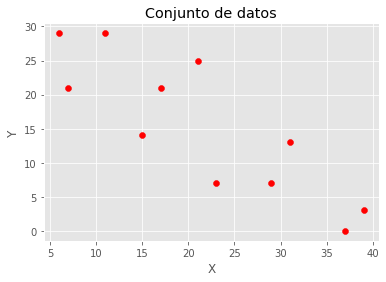

In [15]:
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de datos')
plt.scatter(X, Y, color = 'red')

# Coeficiente de correlación

El coeficiente de correlación es un valor comprendido entre -1 y 1, el cual nos indica si existe una relación lineal entre las distintas variables. En este caso, usaremos el coeficiente de correlación de pearson, cuya fórmula está dada por


$$r=\dfrac{n\sum x_{i}y_{i} - \sum x_{i}\sum y_{i}}{\sqrt{[n\sum x_{i}^{2} - (\sum x_{i})^{2}][n \sum y_{i}^{2} - (\sum y_{i})^{2}]}} $$

En este caso, usaremos el método $corrcoef$ ya implementado en la libreria numpy para calcularlo

In [7]:
coef_correlacion = np.corrcoef(X, Y)[1, 0]
print('Coeficiente de correlación: ', coef_correlacion)

Coeficiente de correlación:  -0.8522825311169206


Ya que hemos obtenido un valor muy cercano a -1, podemos concluir que existe una correlación negativa. Así pues, es viable usar una regresión lineal para encontrar la línea que mejor se ajuste a los datos.

# Calculando la línea de regresión

Debemos encontrar la línea recta que mejor se ajuste a los datos. Recordemos que la ecuación de la línea recta está dada por


$$y = ax + b,$$

donde $a$ es la pendiente de la recta y $b$ es el intercepto con el eje de las x. Afortunadamente, el método de los mínimos cuadrados nos brinda una fórmula cerrada para calcular inmediatamente estos valores. Para el valor de $a$, usamos la siguiente fórmula: 

$$a = \dfrac{n \sum x_{i} y_{i} - \sum x_{i} \sum y_{i}}{n\sum x_{i}^2 - (\sum x_{i})^{2}}.$$

Una vez calculado el valor de $a$, podemos calcular el valor de $b$ usando la siguiente fórmula

$$b = \hat{Y} - a\hat{X},$$

donde $\hat{Y}$ y $\hat{X}$ son las medianas de los conjuntos de datos $Y$ y $X$, respectivamente. Estos cálculos se realizan en la siguiente celda de código.

In [11]:
n = len(X)

a = (n * np.sum(X * Y) - (np.sum(X) * np.sum(Y))) / (n * np.sum(X ** 2) - (np.sum(X)) ** 2)

b = np.median(Y) - a * np.median(X)

print('Valor de a: ', a)
print('Valor de b: ', b)

Valor de a:  -0.7657521025782434
Valor de b:  30.080794154143113


# Interpretando los valores de $a$ y $b$

A simple vista, vemos que los valores concuerdan. La pendiente $a$ es negativa puesto que el coeficiente de correlación presentó una correlación negativa, y el valor del intercepto $b$ es $30$, lo cual tiene sentido, teniendo en cuenta que el valor mas grande en el conjunto de datos $Y$ es $29$. Podemos usar entonces estos valores para crear un modelo predictivo. Para evaluarlo, usaremos el error estandar que presenta el modelo con respecto al conjunto de datos. La fórmula del error estandar es

$$err = \sqrt{\dfrac{1}{N - 1}}\sum y_{i} - \hat{y_{i}},$$

donde $\hat{y_{i}}$ es el valor predicho por el modelo y $y_{i}$ es el valor real.

In [12]:
y = lambda x: a * x + b

Y_pred = y(X)

err_estandar = np.sqrt(1 / (n - 1) * np.sum(Y - Y_pred))

print('Error estándar:', err_estandar)

Error estandar: 1.3721793072660442


# Interpretando el error estándar

El resultado anterior nos indica que el modelo tiene un error de alrededor de $1.37$, donde este valor está dado en las unidades del conjunto de datos. Por lo tanto, a la hora de hacer las predicciones, debemos tener en cuenta que la exactitud se encuentra en un margen de error de $\pm 1.37$ unidades con respecto al valor predicho.

# Graficando la línea de regresión

Por último, vamos a graficar la línea de regresión junto con los datos originales, para corroborar intuitivamente que esta si se está ajustando correctamente a los datos. Esto es sencillo de hacer puesto que solo contamos con dos conjuntos de datos $X$ y $Y$. Sin embargo, esta intuición se pierde cuando trabajamos con conjuntos de 3 o más variables, puesto que las 'líneas' de regresión en realidad corresponden a planos, o en el caso de más de 3 dimensiones, hiperplanos.

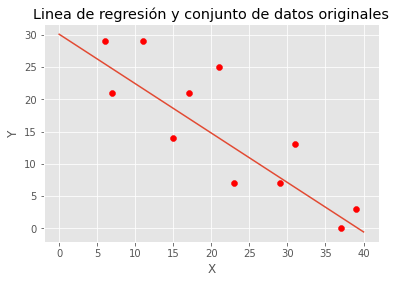

In [14]:
p1 = (0, y(0))
p2 = (40, y(40))

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linea de regresión y conjunto de datos originales')

plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
plt.scatter(X, Y, color = 'red')
plt.show()

# Análisis de resultados

Claramente podemos observar que la línea de regresión se ajusta de forma correcta a los datos proporcionados. Podemos obsevar como la recta efectivamente corta al eje de las $y$ en el punto $(0, 30)$, y que esta presenta una pendiente negativa. Así pues, también podemos observar como la recta presenta un margen de error aproximado a $1.5$ unidades, lo cual corresponde al error estándar ya anteriormente calculado.